# External modules

In [1]:
library(tidyverse)
library(readr)
library(DescTools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [30]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [30]:
n <- 10000

x <- rnorm(n = n)

# EDA

------------------------------------------------------------------------------ 
x (numeric)

            length                 n                NAs            unique'
            10'000            10'000                  0               = n
                              100.0%               0.0%                  
                                                                         
               .05               .10                .25            median
  -1.6571383194272  -1.2879360318516   -0.6672227694966  -0.0004539048107
                                                                         
             range                sd              vcoef               mad
   7.7081315076789   1.0140203434228  135.4839539884810   1.0180330731516
                                                                         
               0s              mean            meanCI
                0   0.0074844312819  -0.0123924083033
             0.0%                     0.0273612708670
    

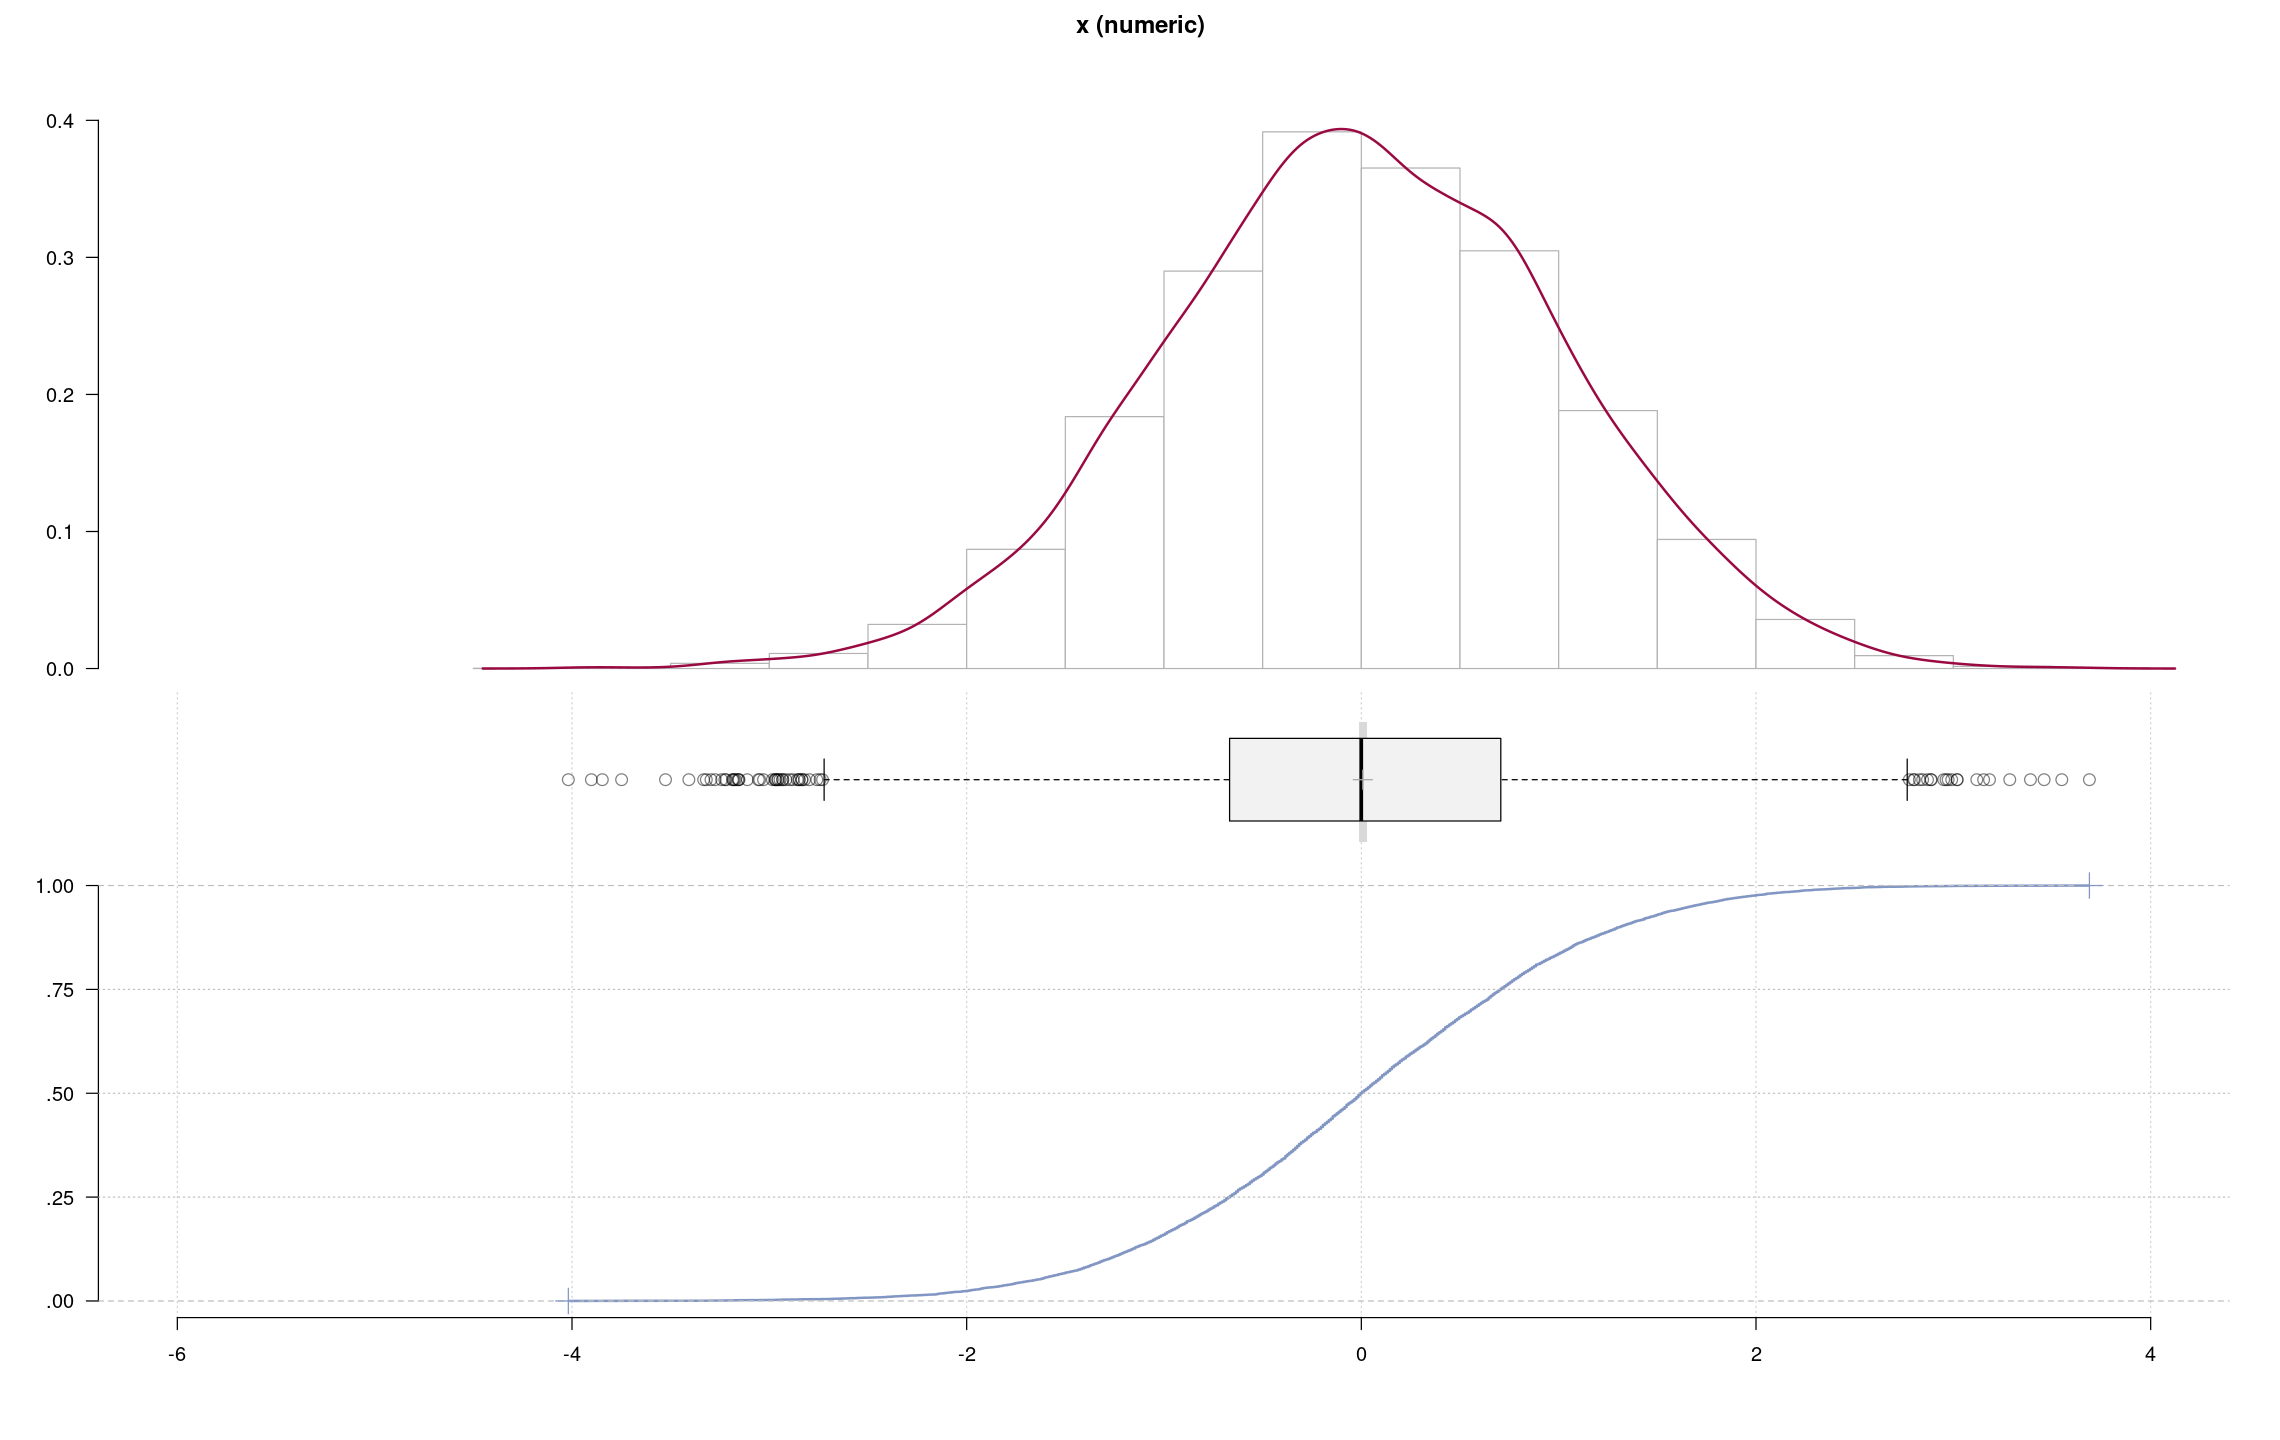

In [31]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [32]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# Estimation

In [33]:
minimum_block_size <- find_minimum_block_size(x, threshold = NULL)

print(minimum_block_size)

[1] 1


In [34]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 200


In [35]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] -4.018577029


In [36]:
print(median(x))

[1] -0.0004539048107


In [37]:
print(calculate_mode(x))

[1] -0.1057717342


In [38]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = NULL, m = 50)

print(candidate_block_sizes)

  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200


In [39]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])


Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method

In [40]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [41]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

          loc_star   scale_star      shape_star
1   -0.37030531270 1.0163677684 -0.247465779412
4   -0.15115278473 0.8763020183 -0.211345335085
44   0.18250239288 0.5822911523 -0.108043690408
56   0.42848820208 0.4781542568 -0.072494360050
59   0.52245365015 0.4335732778 -0.053440535488
60   0.70228712185 0.3793127632 -0.037243146712
73   0.39378007928 0.4884641381 -0.074798391554
76   0.26610104969 0.5458282030 -0.096740819338
77   0.56054907982 0.4225465556 -0.050401322597
79   0.65118348336 0.3940923507 -0.041324063434
84  -1.21949980886 1.2988576129 -0.247619295396
101 -5.33622559658 3.6341336796 -0.399366243558
102 -1.81664969611 1.5523179245 -0.266732009308
118  0.48985798719 0.4503260151 -0.062230805343
119 -2.32102144565 1.8399268525 -0.294895359880
121  0.32398090343 0.5249200265 -0.089815138210
135 -0.53385897023 0.9088205364 -0.180882558836
142  0.91678982713 0.3244947804 -0.020923782205
145  0.88589569678 0.3346860375 -0.024424479537
147 -3.46840304281 2.4367560109 -0.33219

In [42]:
print(gev_mixture_model_object$weights)

             1              4             44             56             59 
0.006400640064 0.000700070007 0.047204720472 0.000400040004 0.037003700370 
            60             73             76             77             79 
0.042304230423 0.044004400440 0.040704070407 0.020802080208 0.025602560256 
            84            101            102            118            119 
0.035703570357 0.001300130013 0.037803780378 0.012401240124 0.007000700070 
           121            135            142            145            147 
0.005500550055 0.080508050805 0.003800380038 0.014901490149 0.001200120012 
           152            165            167            169            172 
0.136313631363 0.012201220122 0.009500950095 0.022902290229 0.001500150015 
           177            182            183            185            187 
0.017201720172 0.017401740174 0.077407740774 0.107310731073 0.045904590459 
           192 
0.087108710871 


In [43]:
print(which.max(gev_mixture_model_object$weights))

152 
 21 


In [44]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 21


In [45]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 12


In [46]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
31581.79171 32468.66357 


In [47]:
print(gev_mixture_model_object$threshold)

[1] -4.018577029


# Diagnostic

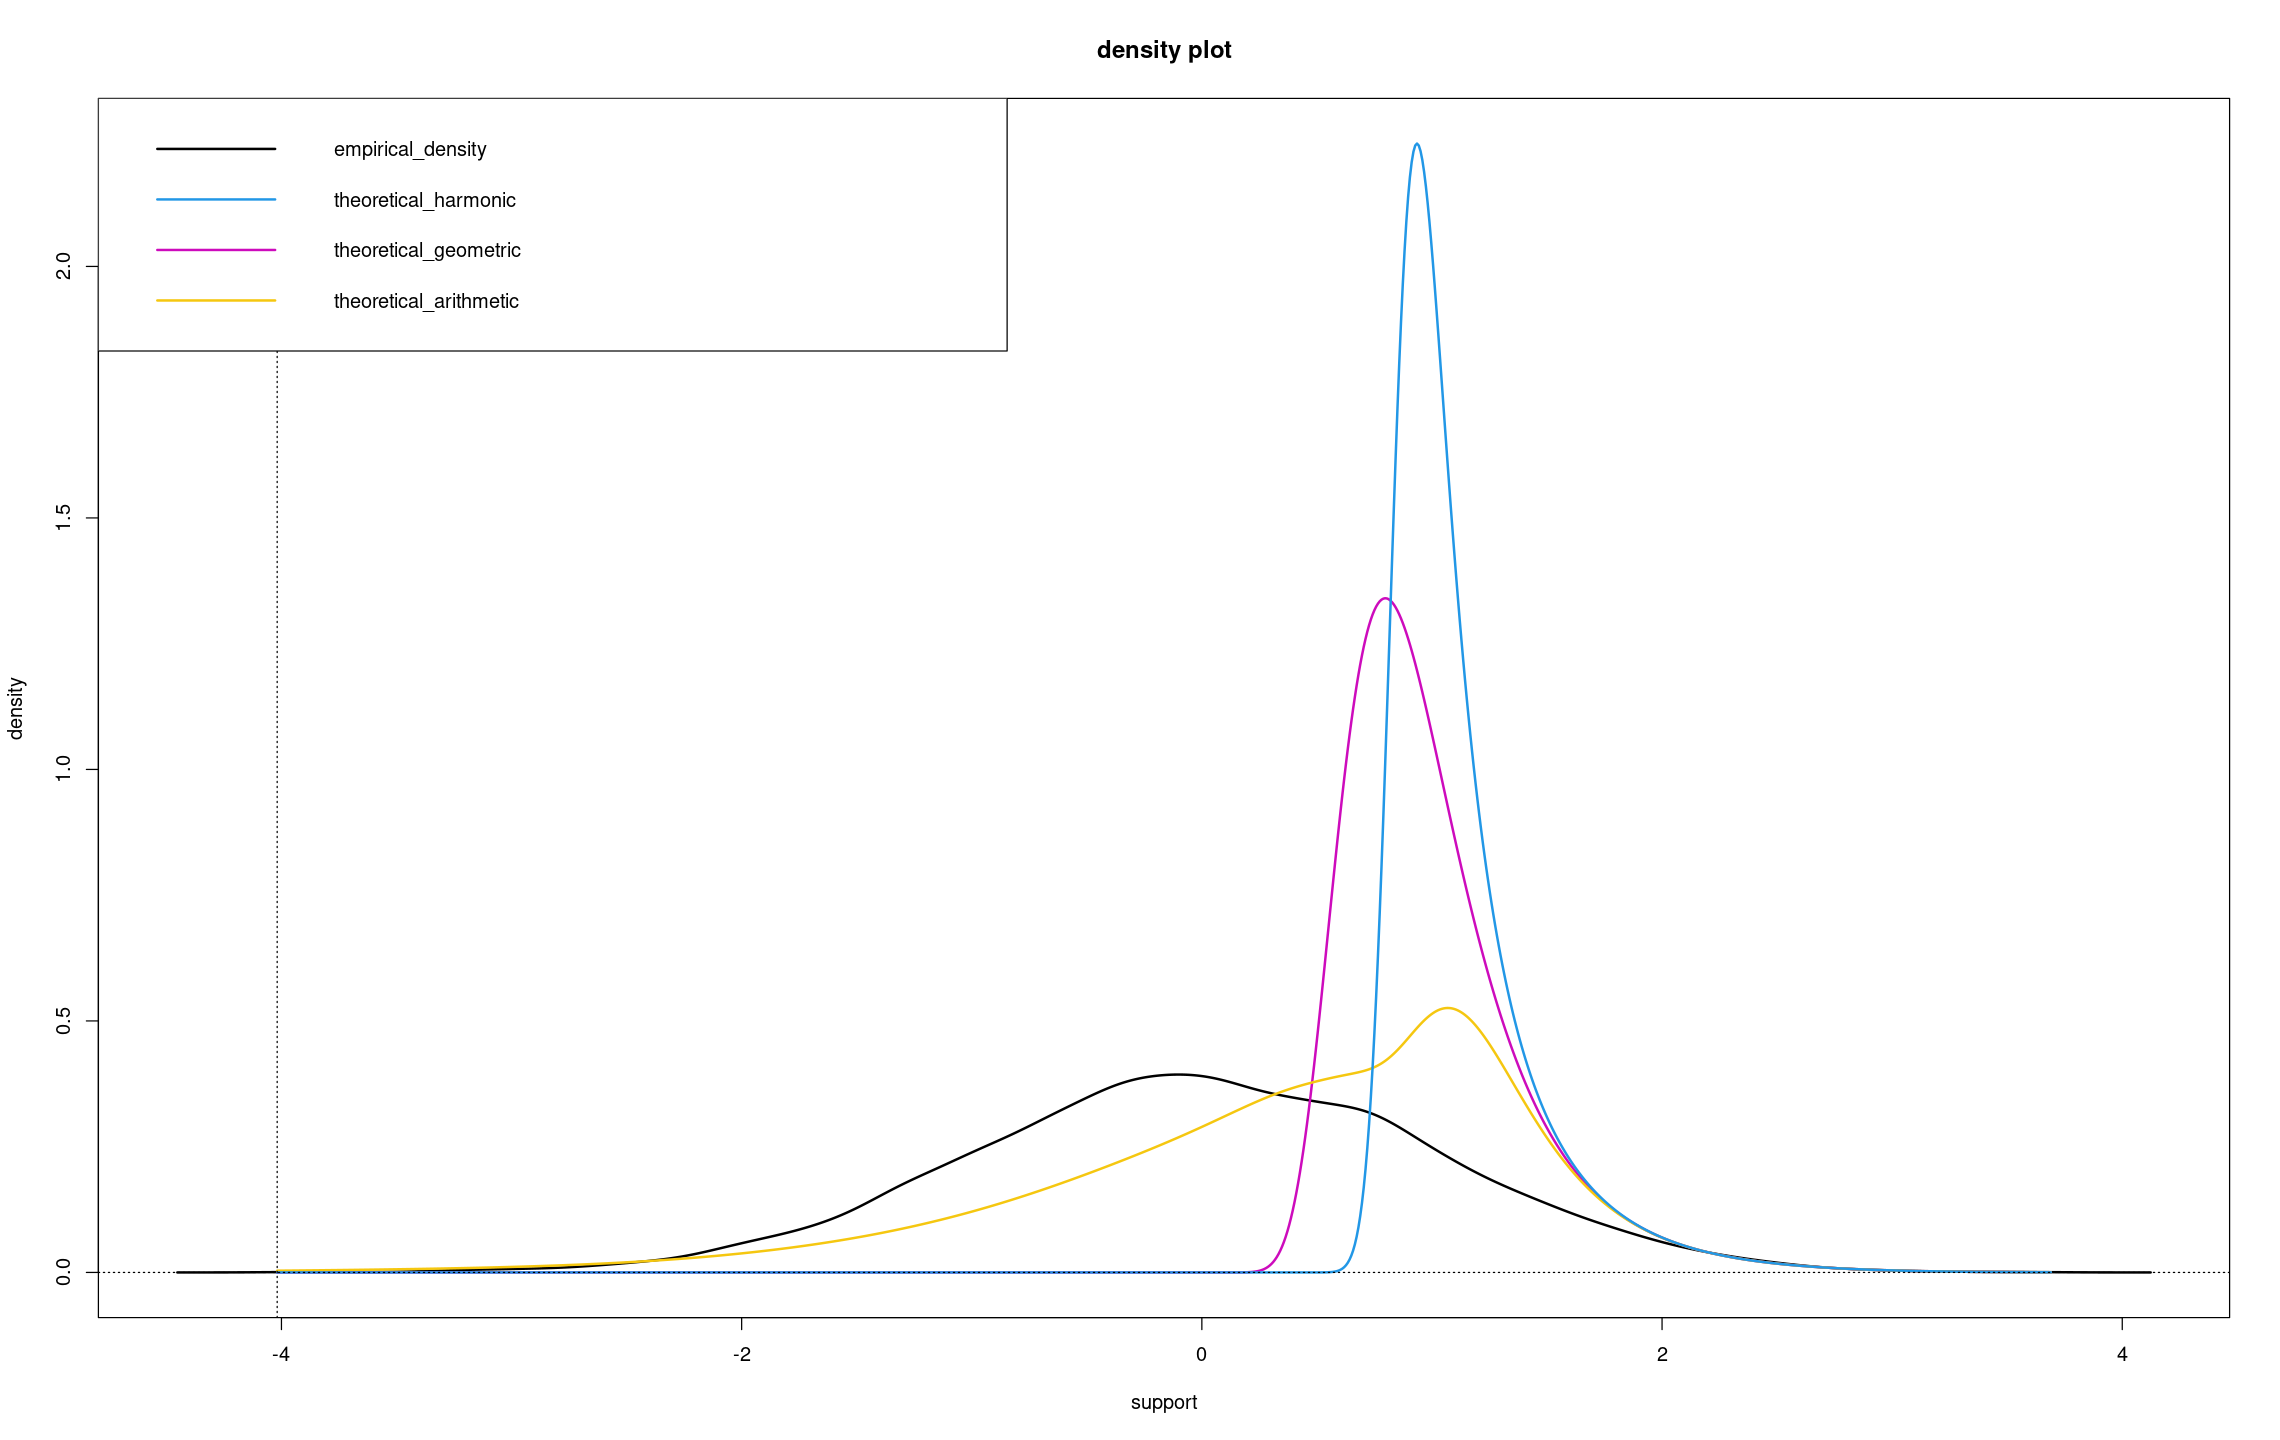

In [48]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

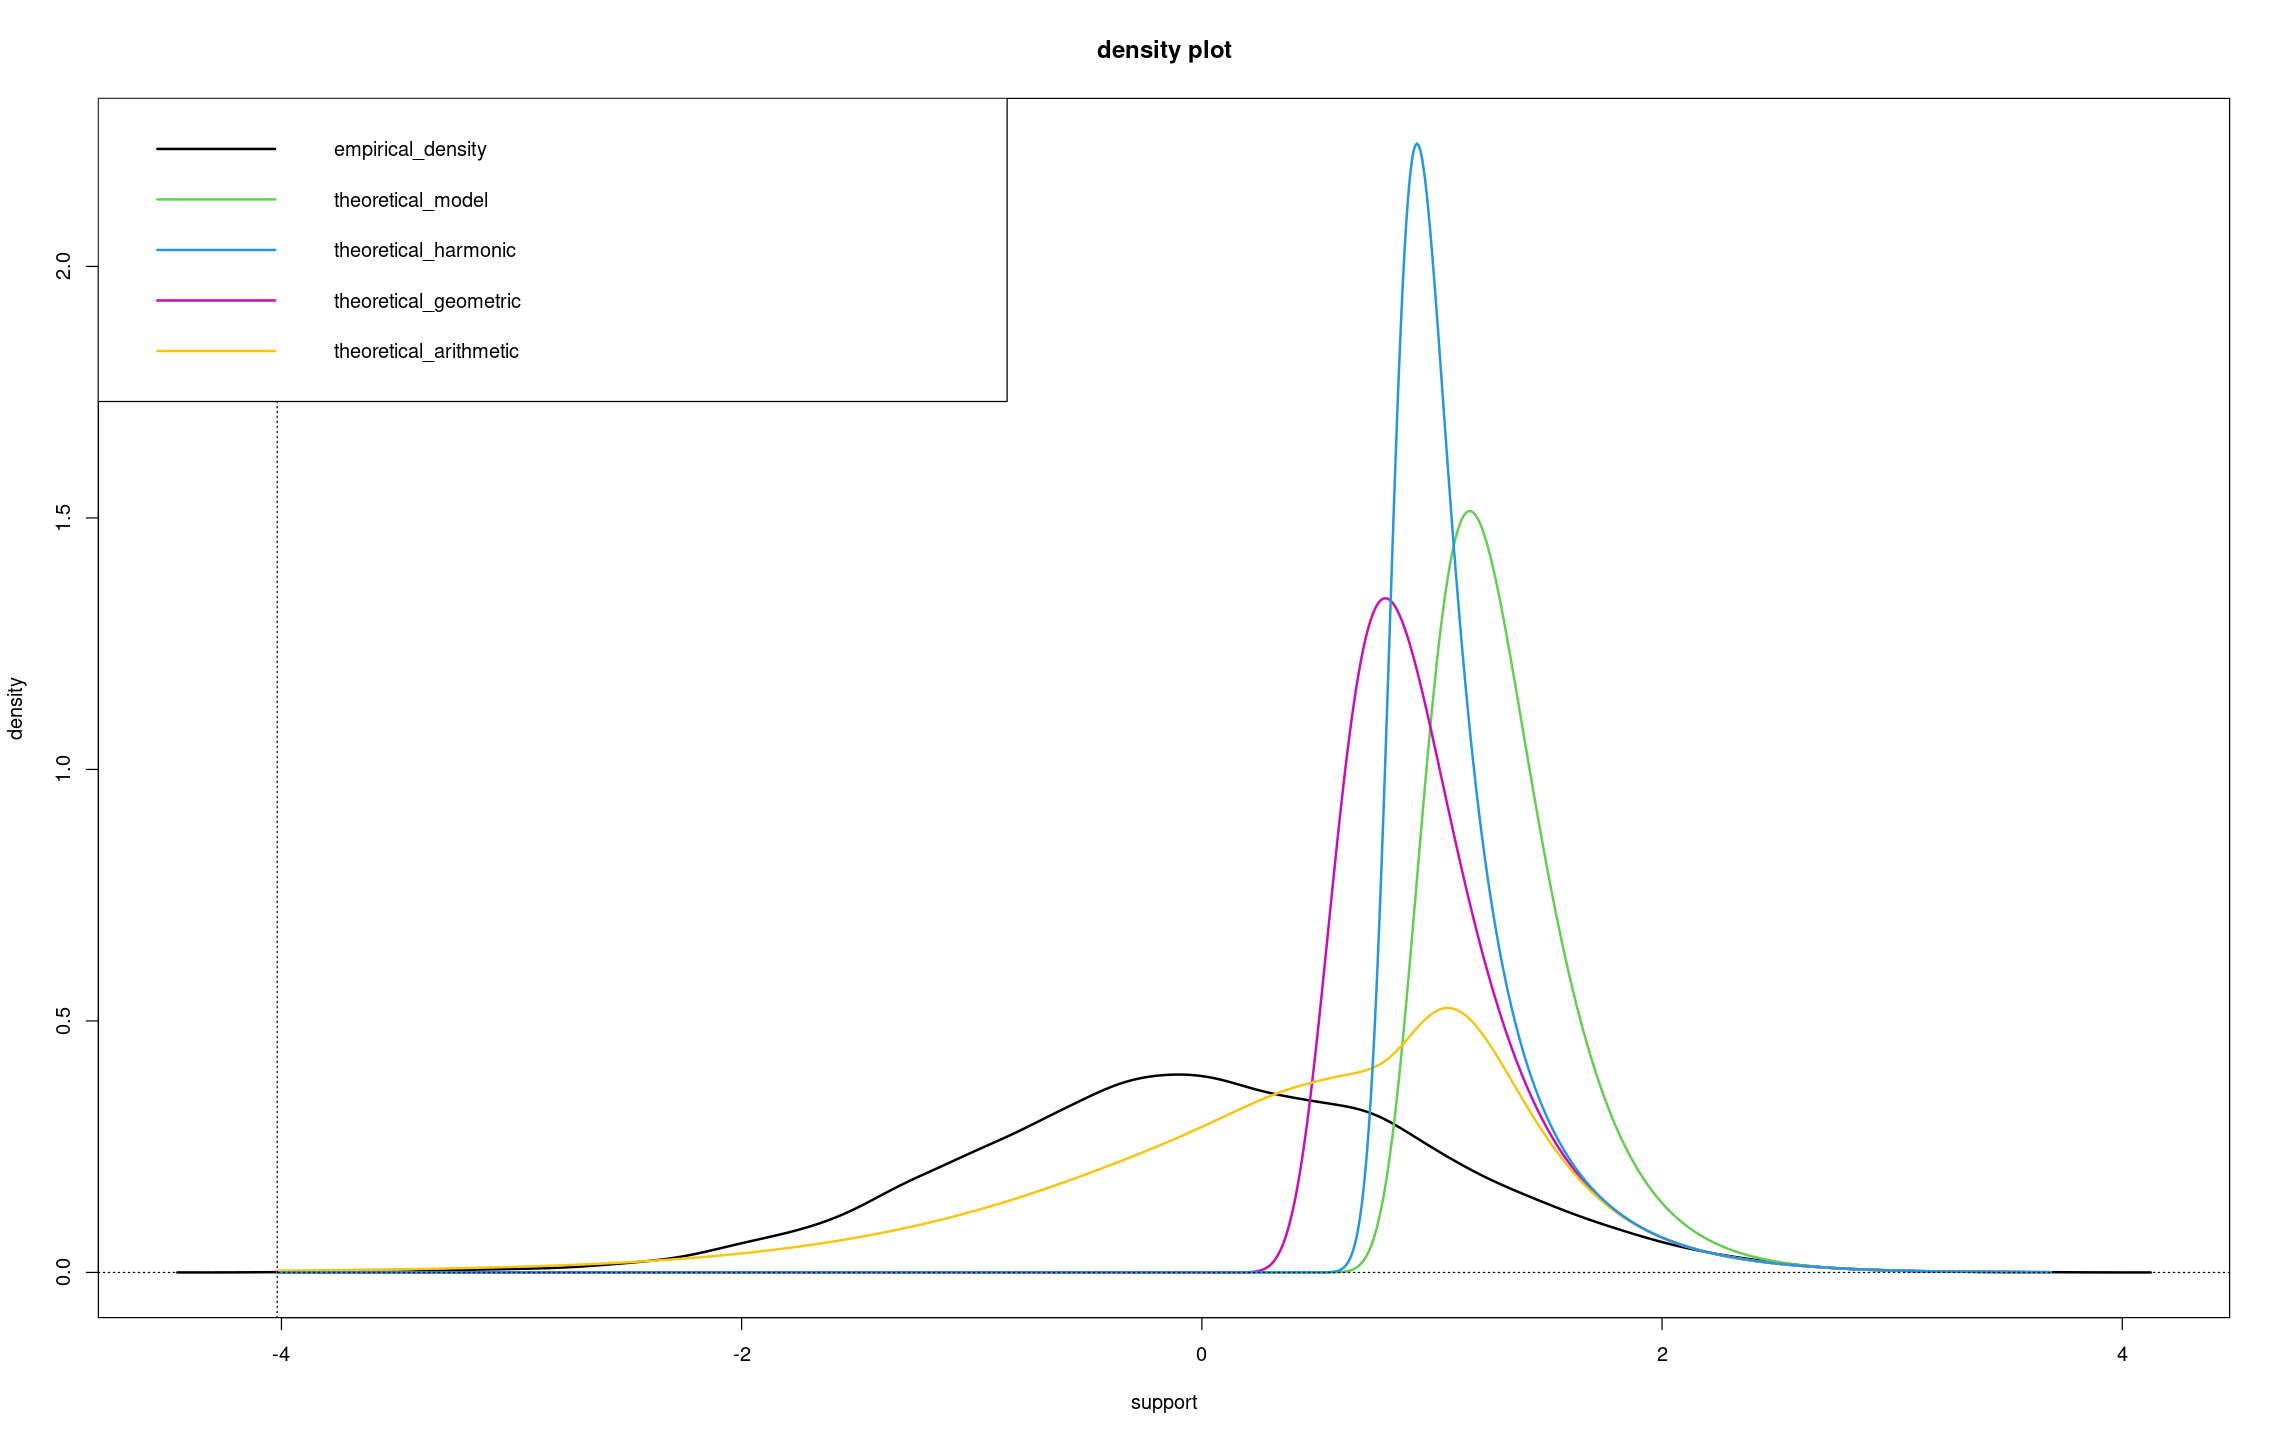

In [49]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

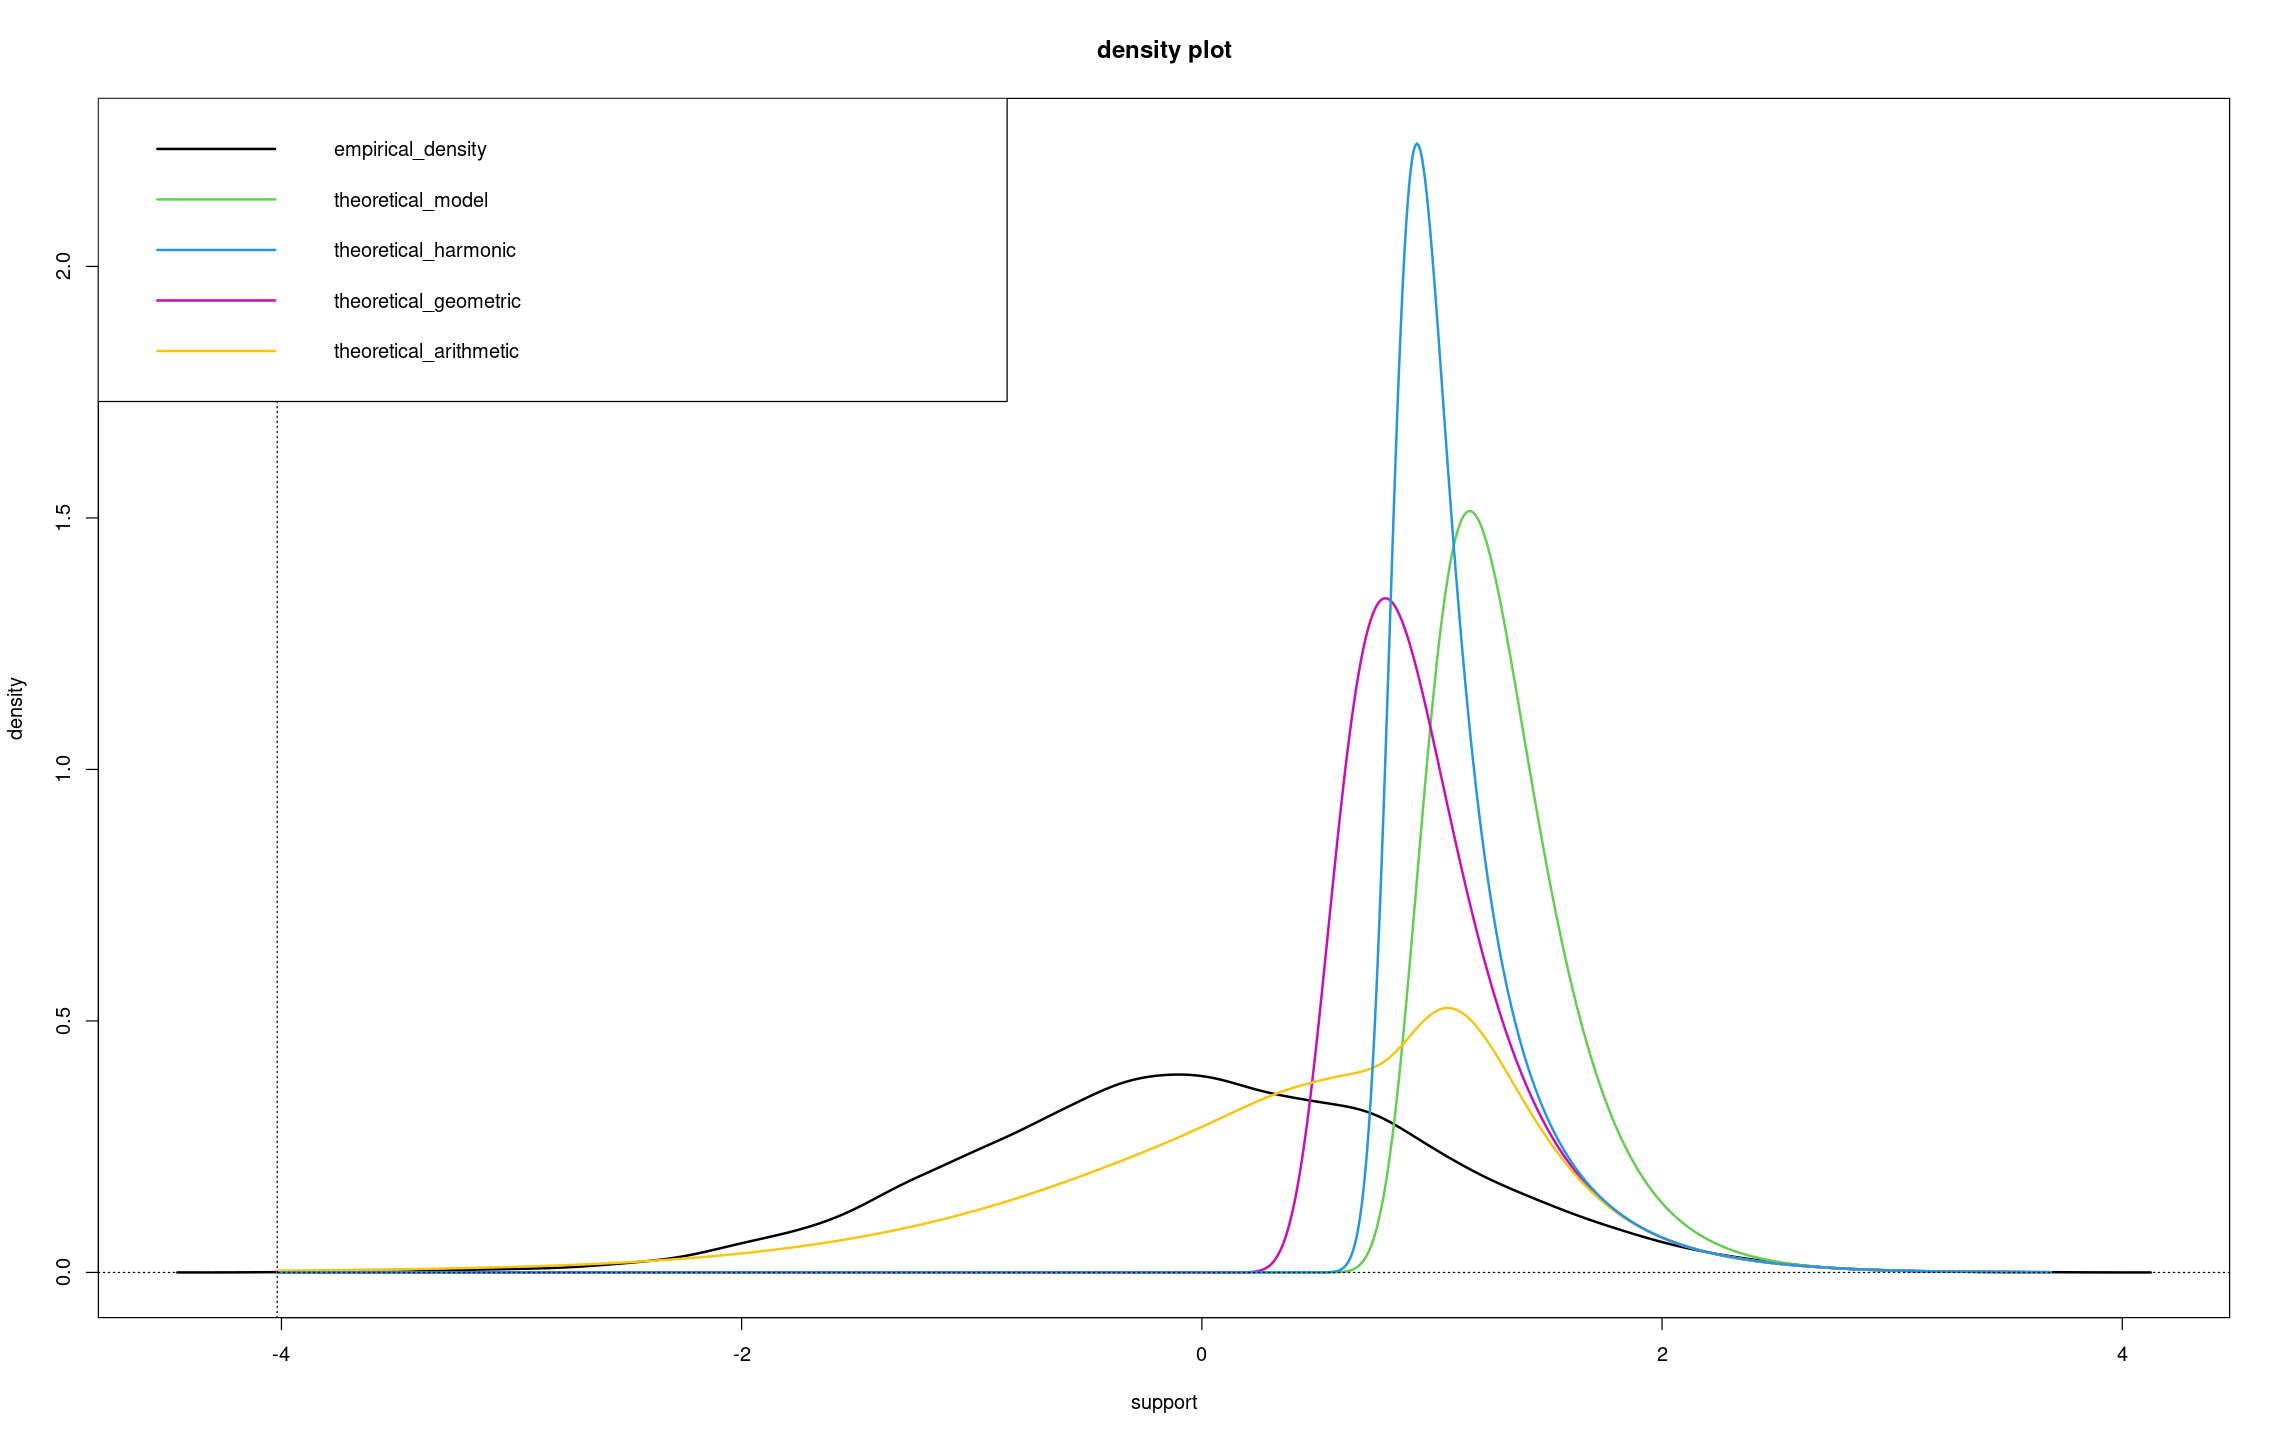

In [50]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

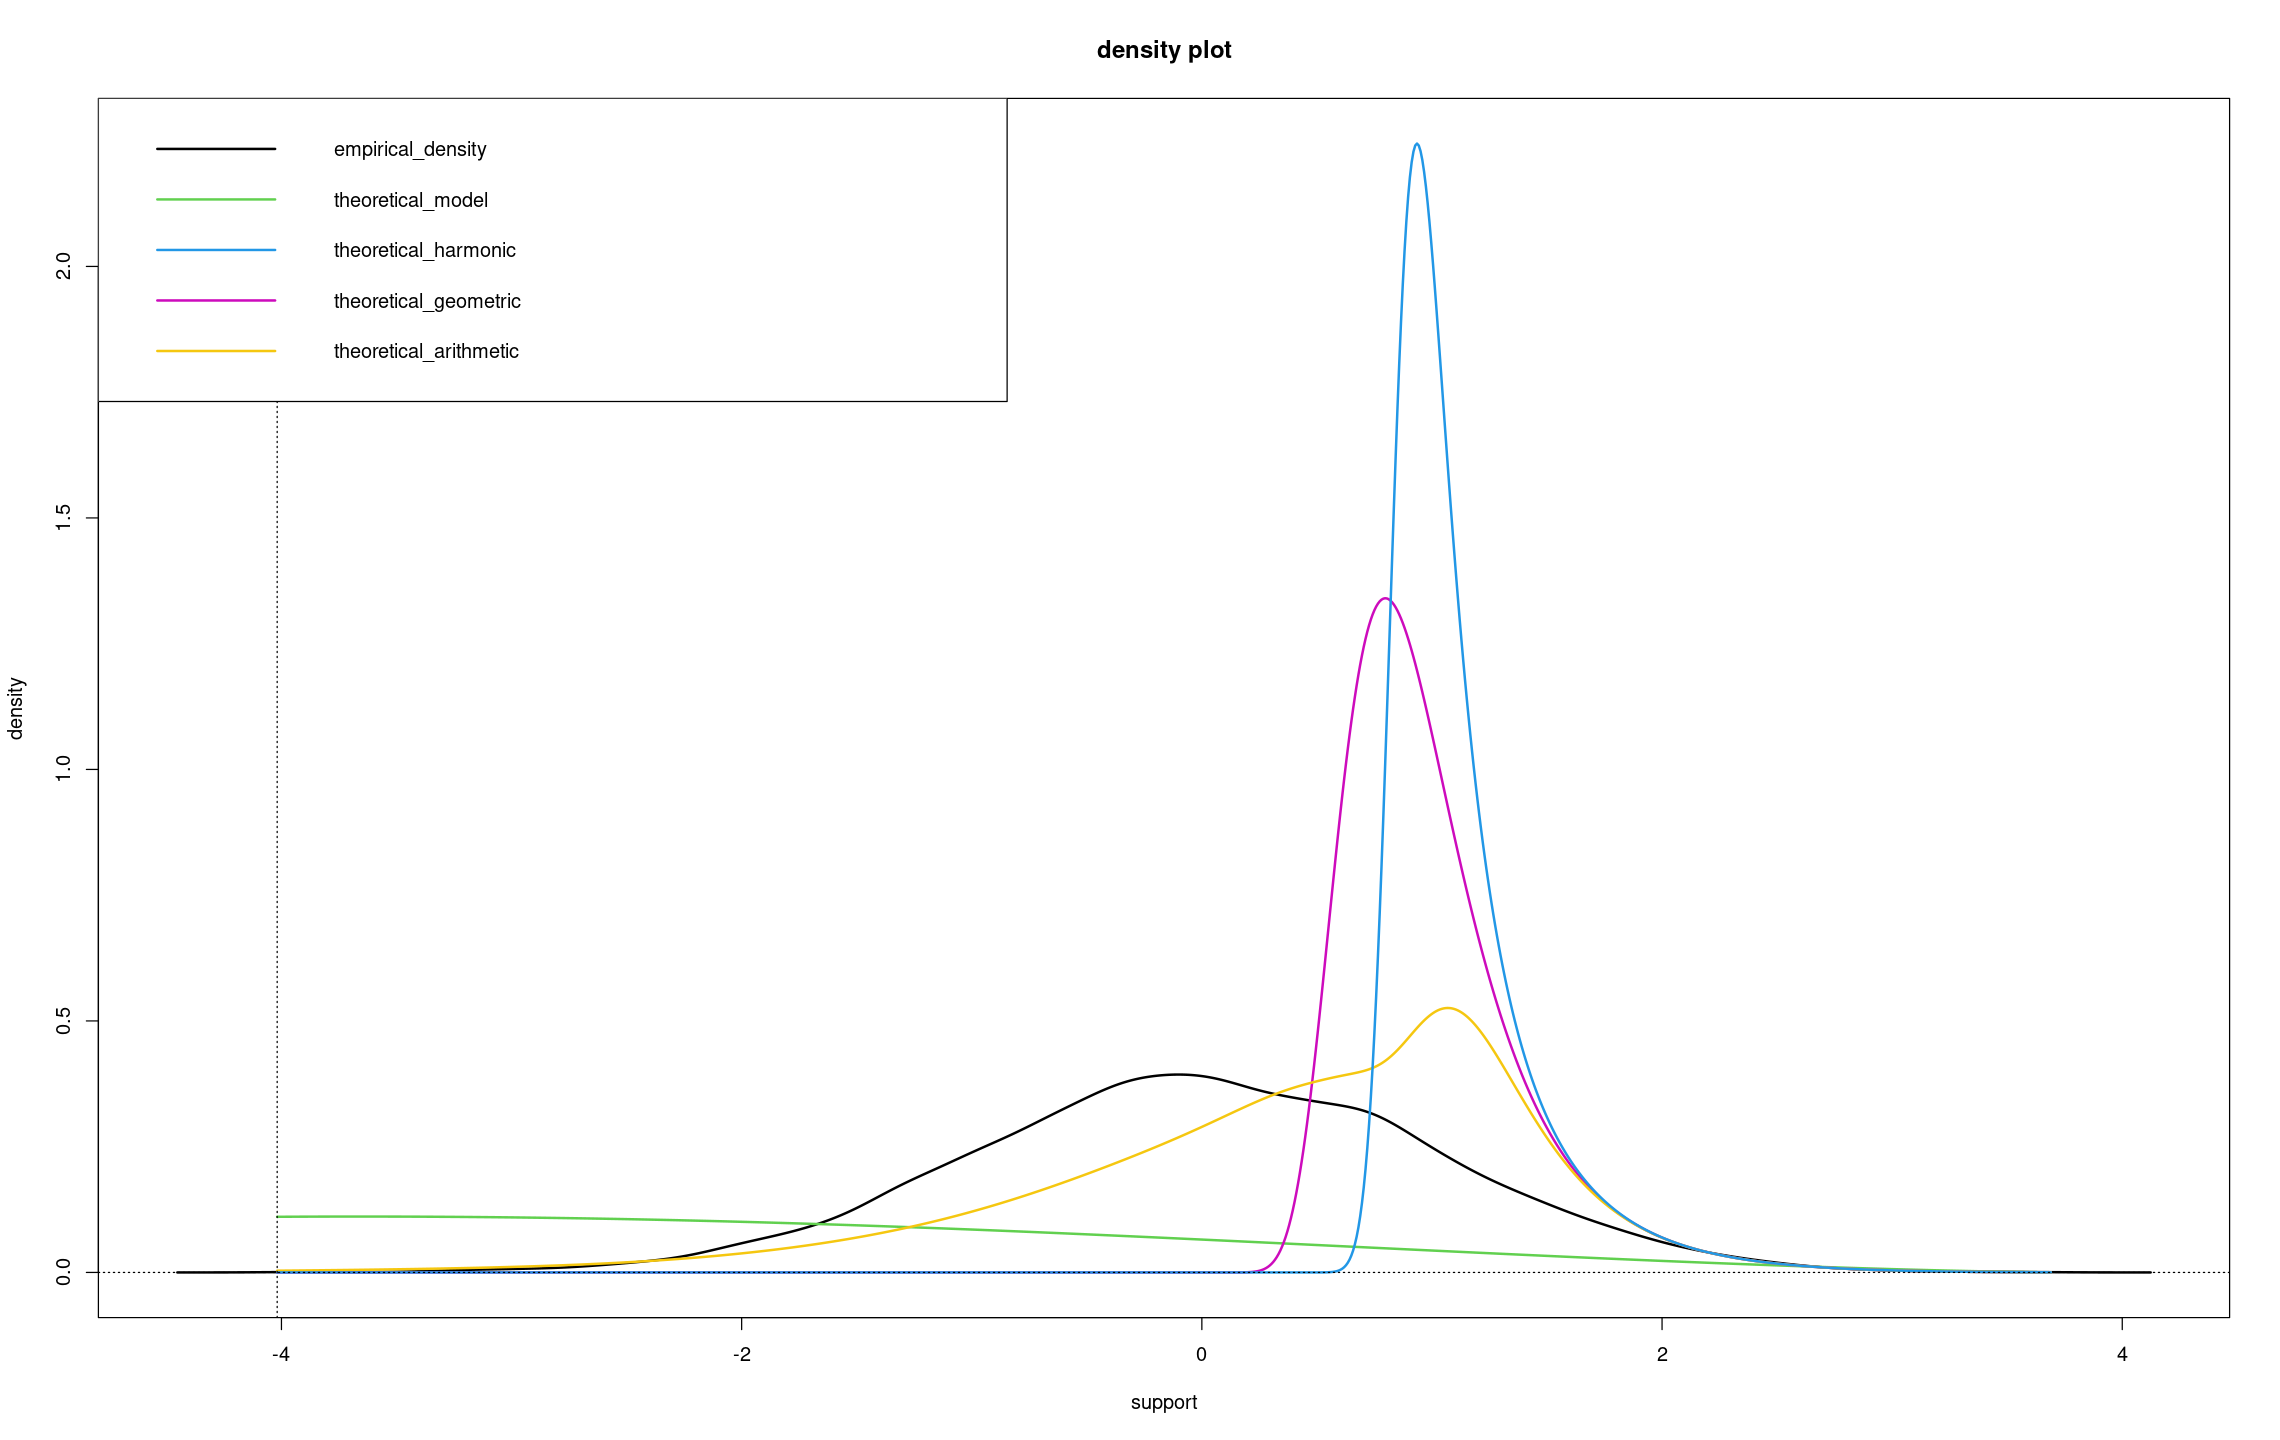

In [51]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

# Quantiles

In [52]:
alpha <- n^(-2)

print(alpha)

[1] 1e-08


In [53]:
true_quantile <- qnorm(p = 1 - alpha)

print(true_quantile)

[1] 5.612001243


In [54]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”


,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
1,3.6492686895,3.693765214,3.738261738
4,3.6508270705,3.910630119,4.170433167
44,2.5413205246,4.835384004,7.129447484
56,1.7955104734,5.289200724,8.782890975
59,1.1889820237,5.604116203,10.019250382
60,1.3038603935,5.758349114,10.212837834
73,0.9986478088,5.277743834,9.556839859
76,1.7230997312,4.958711072,8.194322413
77,0.4115614710,5.631183889,10.850806306


In [55]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”


,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
1,3.6492686895,3.693765214,3.738261738
4,3.6508270705,3.910630119,4.170433167
44,2.5413205246,4.835384004,7.129447484
56,1.7955104734,5.289200724,8.782890975
59,1.1889820237,5.604116203,10.019250382
60,1.3038603935,5.758349114,10.212837834
73,0.9986478088,5.277743834,9.556839859
76,1.7230997312,4.958711072,8.194322413
77,0.4115614710,5.631183889,10.850806306


In [56]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”


,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
1,3.6492686895,3.693765214,3.738261738
4,3.6508270705,3.910630119,4.170433167
44,2.5413205246,4.835384004,7.129447484
56,1.7955104734,5.289200724,8.782890975
59,1.1889820237,5.604116203,10.019250382
60,1.3038603935,5.758349114,10.212837834
73,0.9986478088,5.277743834,9.556839859
76,1.7230997312,4.958711072,8.194322413
77,0.4115614710,5.631183889,10.850806306


In [57]:
options(repr.plot.width=23, repr.plot.height=6)

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”


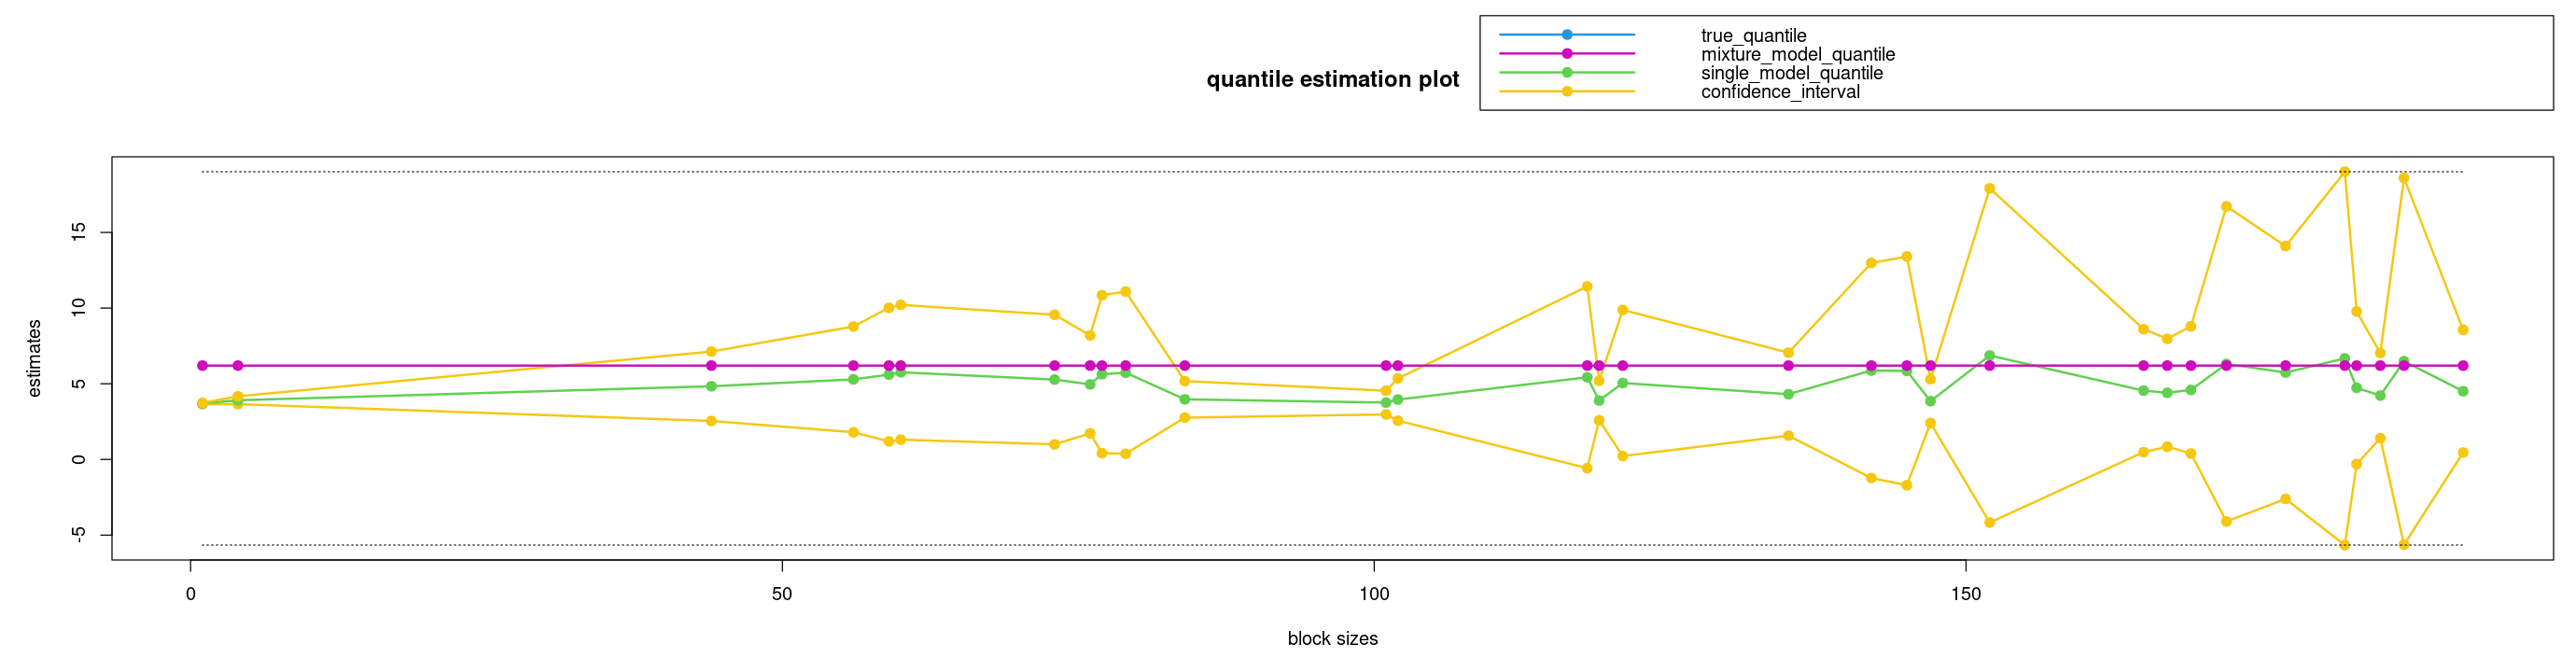

In [58]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”


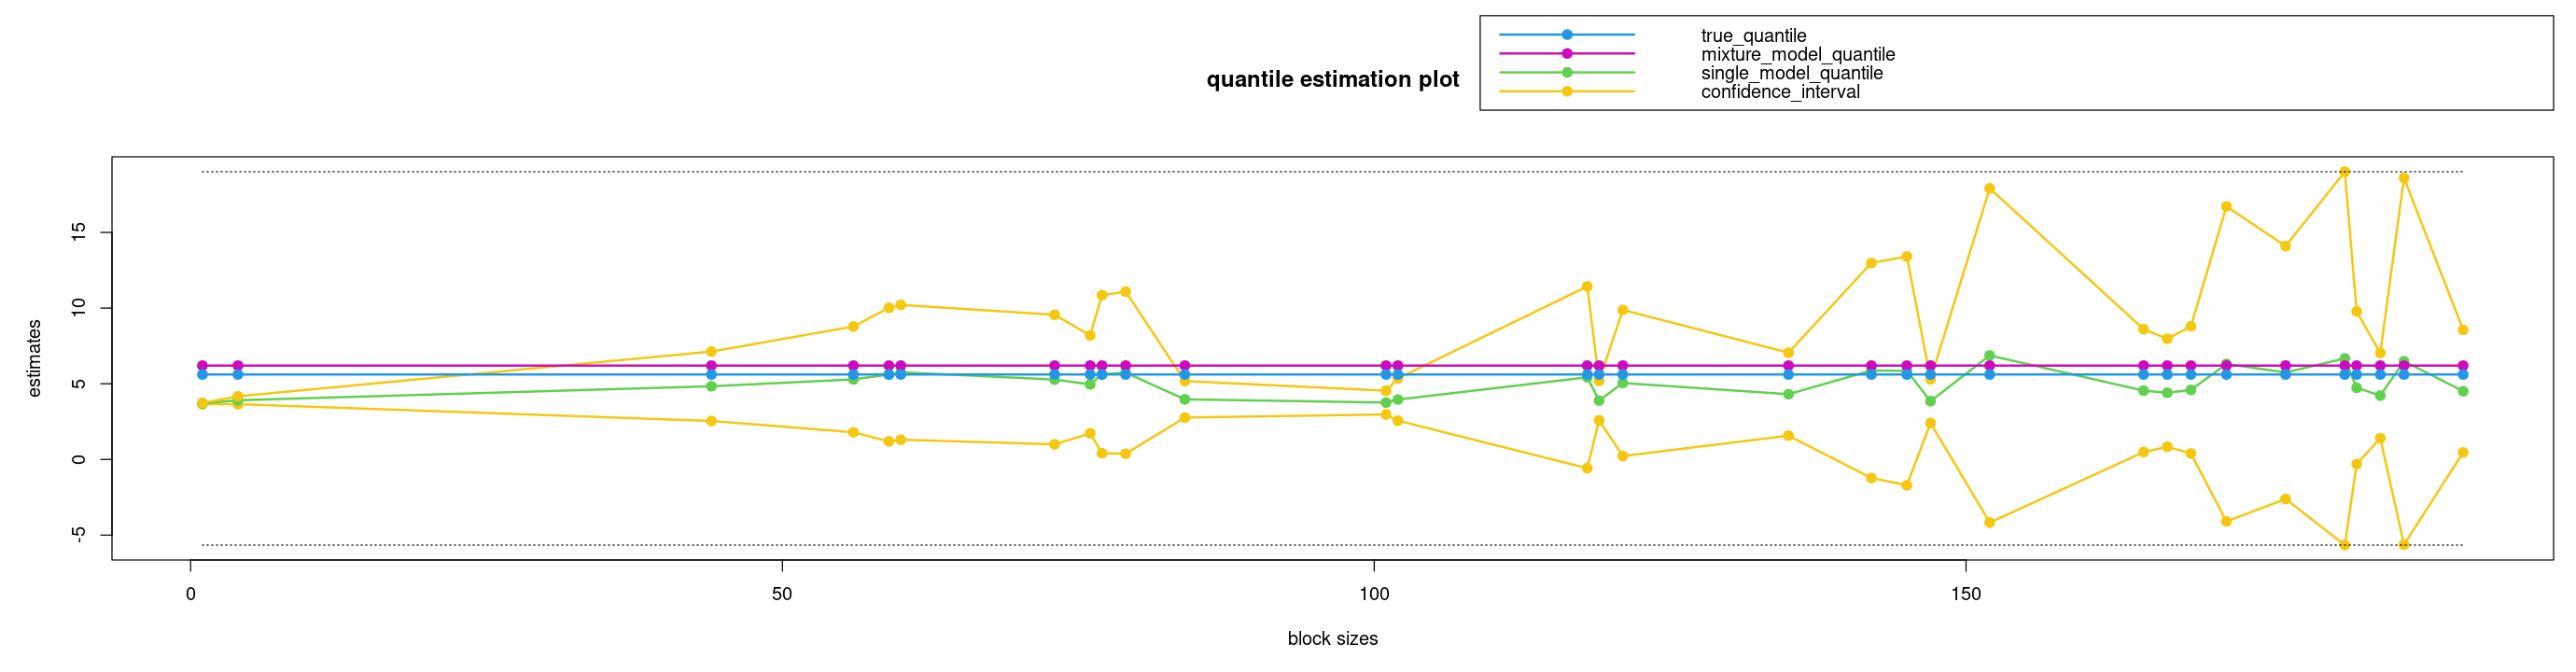

In [59]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = true_quantile,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")
